In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
from jupyter_workflow.data1 import get_fremont_data

In [3]:
data = get_fremont_data()

In [4]:

#data = pd.read_csv('Fremont.csv')
data.head()


,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [5]:
#data = pd.read_csv('Fremont.csv', parse_dates= True, index_col= 'Date')
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [6]:
data.shape
data.info()

(50328, 3)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50328 entries, 2012-10-03 00:00:00 to 2018-06-30 23:00:00
Data columns (total 3 columns):
West     50319 non-null float64
East     50319 non-null float64
Total    50319 non-null float64
dtypes: float64(3)
memory usage: 1.5 MB


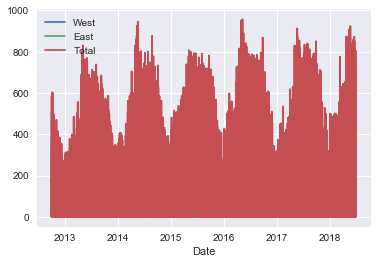

In [7]:
data.plot()

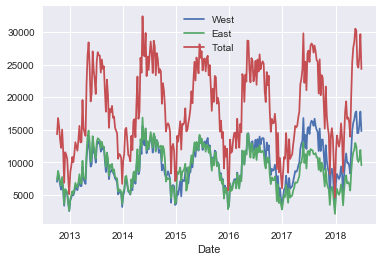

In [8]:
data.resample("W").sum().plot() # weekly analysis

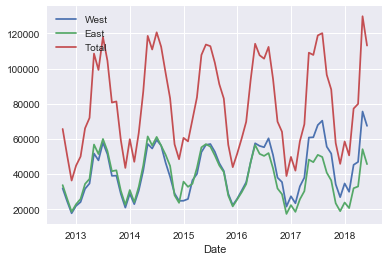

In [9]:
data.resample("M").sum().plot() # monthly analysisc

## Part 2 :video : Further data exploration

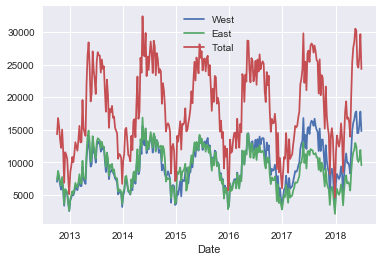

In [10]:
#import matplotlib.pyplot as plt
#plt.style.use('seaborn')
data.resample("W").sum().plot() # weekly analysis...note in the winter months the numbers of cycles dip drastically


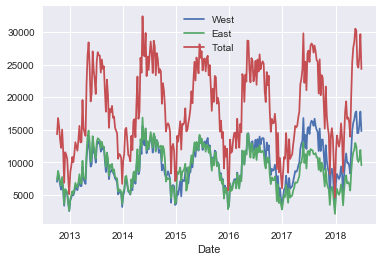

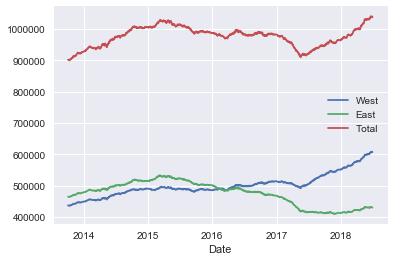

In [11]:
#data.columns = ['East', 'West']
data.resample("W").sum().plot()
data.resample('D').sum().rolling(365).sum().plot()

(0, 1071703.9)

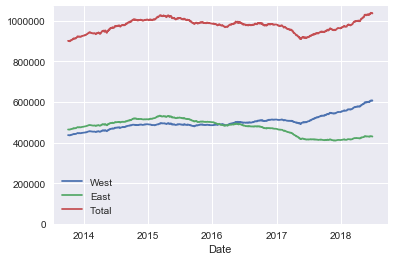

In [12]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

(0, 1071703.9)

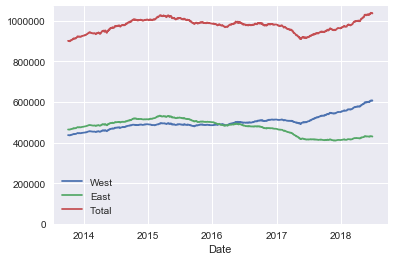

In [13]:
#data['Total'] = data["East"] + data["West"] # adding one more column 'Total' to the data
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

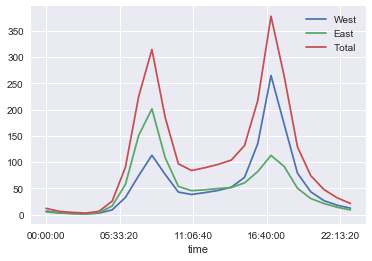

In [14]:
#Analysing as per time
data.groupby(data.index.time).mean().plot() # Note the eastern and the western sidewalks seem to swap the number of cycles
 # handled in the morning and evening times...

In [15]:
# using the pivot table for futher analyis
pivoted = data.pivot_table( values = 'Total', index = data.index.time, columns = data.index.date) # this gives us a table of cycle
# traffic in the side walks daywise vs each hour of the day
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


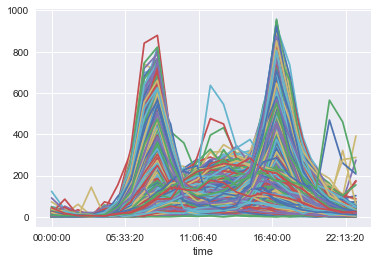

In [16]:
pivoted.plot(legend = False) # Note each line represents a day 

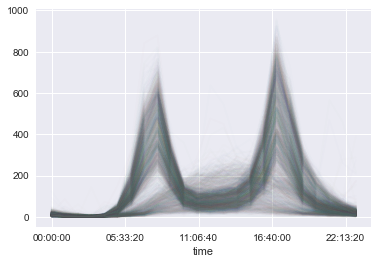

In [17]:
# let us get the transparency alpha keyword into the plot() method for a better visualization
pivoted.plot(legend = False , alpha = 0.01)
# We can clearly see that there are two patterns emerging out ...on some days the cycylists commute with peaks in the morning and
# evening and on some other days(probably during weekends / holidays there is a gentle high slope  in the afternoon period.)

## Part 3 : video : version control with git and github

## Part 4 : video : working with data and github

## Part 5 : video : Creating a python package